In [1]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
mPose = mp.solutions.pose
pose = mPose.Pose()
mpDraw = mp.solutions.drawing_utils

In [3]:
def get_pose_path(pose):
    # get the path of on ereference image for the pose
    path=f'./reference/{pose}.jpg'
    return path

def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1 = landmark1.x,landmark1.y
    x2, y2= landmark2.x,landmark2.y
    x3, y3 = landmark3.x,landmark3.y
    radians = np.arctan2(y3-y2, x3-x2) - np.arctan2(y1-y2, x1-x2)
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return angle

def check_pose(landmarks, pose_name):
    # Define a dictionary to store the results
    result = {
        "is_correct": False,
        "feedback": []
    }
    
    # Extract relevant landmarks
    left_elbow_angle = calculateAngle(landmarks[mPose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mPose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mPose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mPose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mPose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mPose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mPose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mPose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mPose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mPose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mPose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mPose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mPose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mPose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mPose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mPose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mPose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mPose.PoseLandmark.RIGHT_ANKLE.value])
    
    right_torso_angle = calculateAngle(landmarks[mPose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mPose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mPose.PoseLandmark.RIGHT_KNEE.value])
    
    left_torso_angle = calculateAngle(landmarks[mPose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mPose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mPose.PoseLandmark.LEFT_KNEE.value])
    
    if pose_name.lower() == "warrior":
        if (left_knee_angle >= 90 and left_knee_angle < 120) or (right_knee_angle >= 90 and right_knee_angle < 120):
            result["feedback"].append("knee angle is correct")
        else:
            result["feedback"].append(f"Adjust front knee angle, target: 90")
        
        if (left_knee_angle > 165 and left_knee_angle < 195) or (right_knee_angle > 165 and right_knee_angle < 195):
            result["feedback"].append("Back leg is straight")
        else:
            result["feedback"].append(f"Straighten back leg")
        if (left_elbow_angle > 160 ) and (right_elbow_angle > 160):
            if left_shoulder_angle > 80 and left_shoulder_angle < 120 and right_shoulder_angle > 80 and right_shoulder_angle < 120:
                result["feedback"].append("Arms are correctly positioned")
            else:
                result["feedback"].append(f"Adjust arm position, target: 180")
        else:
            result["feedback"].append(f"Adjust arm position, target: 180")
        
    elif pose_name.lower() == "tree":
        if ( left_knee_angle < 50) or (right_knee_angle<50):
            result["feedback"].append("knee angle is correct")
        else:
            result["feedback"].append(f"Adjust front knee angle, target: 30°")
        
        if (left_knee_angle > 165 and left_knee_angle < 195) or (right_knee_angle > 165 and right_knee_angle < 195):
            result["feedback"].append("Back leg is straight")
        else:
            result["feedback"].append(f"Straighten back leg")
        if left_shoulder_angle >150 and right_shoulder_angle >150:
            result["feedback"].append("Shoulder angle is correct")
        else:
            result["feedback"].append(f"Adjust shoulder angle, target: 150")
        
        if (left_elbow_angle > 160) and (right_elbow_angle > 160):
            result["feedback"].append("Elbow angle is correct")
        else:
            result["feedback"].append(f"Adjust elbow angle, target: 180°")
        if (left_torso_angle>160 or right_torso_angle >160) and (left_torso_angle < 140 or right_torso_angle < 140):
            result["feedback"].append("Torso angle is correct")
        else: 
            result["feedback"].append(f"{left_torso_angle:.1f}Adjust torso angle")
        
    elif pose_name.lower() == "goddess":
        if left_knee_angle <110 and right_knee_angle <110 :
            result["feedback"].append("Knee angle is correct")
        else:
            result["feedback"].append(f"Adjust knee angle, target: 90°")
        
        if left_shoulder_angle < 110 and right_shoulder_angle < 110:
            result["feedback"].append("Shoulder angle is correct")
        else:
            result["feedback"].append(f"Adjust shoulder angle, target: 90°")
        
        if (left_elbow_angle < 100 and left_elbow_angle>80) and (right_elbow_angle < 110 and right_elbow_angle > 80):
            result["feedback"].append("Elbow angle is correct")
        else:
            result["feedback"].append(f"Adjust elbow angle, target: 90°")
        if left_torso_angle < 120 and right_torso_angle < 120:
            result["feedback"].append("Torso angle is correct")
        else: 
            result["feedback"].append(f"Adjust torso angle, target: 90°")
        
    elif pose_name.lower() == "downdog":
        if left_elbow_angle >160 and right_elbow_angle >160 :
            result["feedback"].append("Elbow angle is correct")
        else:
            result["feedback"].append(f"Adjust elbow angle, target: 180")
        
        if left_shoulder_angle > 160 and right_shoulder_angle > 160:
            result["feedback"].append("Shoulder angle is correct")
        else:
            result["feedback"].append(f"Adjust shoulder angle, target: 180°")
        if left_torso_angle < 100 and right_torso_angle < 100:
            result["feedback"].append("Torso angle is correct")
        else: 
            result["feedback"].append(f"Adjust torso angle, target: 90")

    elif pose_name.lower() == "plank":
        if left_elbow_angle >160 and right_elbow_angle >160 :
            result["feedback"].append("Elbow angle is correct")
        else:
            result["feedback"].append(f"Adjust elbow angle, target: 180")
        
        if left_shoulder_angle > 60 and right_shoulder_angle > 60 and left_shoulder_angle < 90 and right_shoulder_angle < 90:
            result["feedback"].append("Shoulder angle is correct")
        else:
            result["feedback"].append(f"Adjust shoulder angle, target: 75")
        if left_torso_angle > 160 and right_torso_angle >160:
            result["feedback"].append("Torso angle is correct")
        else: 
            result["feedback"].append(f"Adjust torso angle, target: 180")
        if left_knee_angle > 160 and right_knee_angle > 160:
            result["feedback"].append("Knee angle is correct")
        else:
            result["feedback"].append(f"Adjust knee angle, target: 180")
       
    
    else:
        result["feedback"].append("Unknown pose")
        return result
    
    # If we've made it this far without returning, and we have some positive feedback, consider the pose correct
    if len(result["feedback"]) > 0 and not any("Adjust" in feedback or "Unknown" in feedback for feedback in result["feedback"]):
        result["is_correct"] = True
    
    return result


d:\Programming\DataScienceProjects\ai-trainer\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


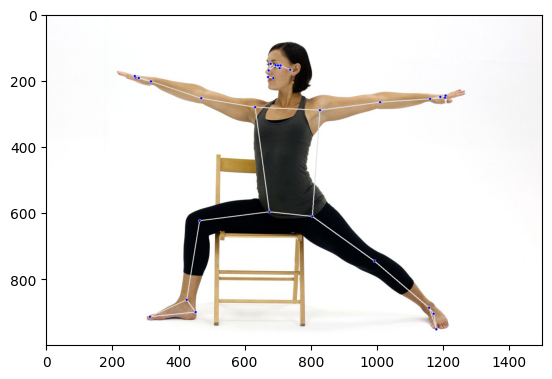

In [4]:
static_image_path = "./00000122.jpg"
image = cv2.imread(static_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image)
if results.pose_landmarks:
    for id, lm in enumerate(results.pose_landmarks.landmark):
        h, w, c = image.shape
        cx, cy = int(lm.x*w), int(lm.y*h)
    
    mpDraw.draw_landmarks(image, results.pose_landmarks, mPose.POSE_CONNECTIONS)

    plt.imshow(image)

In [5]:
print(check_pose(results.pose_landmarks.landmark, "downdog"))

{'is_correct': False, 'feedback': ['Elbow angle is correct', 'Adjust shoulder angle, target: 180°', 'Adjust torso angle, target: 90']}


In [6]:
def video_recognition(pose_name):
    # pose_path = get_pose_path(pose_name) # this function should return the path of the reference image for the pose
    cap = cv2.VideoCapture(0)
    window_name = "window"
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # frame_rgb = cv2.flip(frame_rgb,1)

        
        results = pose.process(frame_rgb)
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            pose_check_result = check_pose(landmarks, pose_name)
            outline_color = (0, 255, 0) if pose_check_result["is_correct"] else (0, 0, 255)
            custom_connections = mpDraw.DrawingSpec(color=outline_color, thickness=2)
            custom_landmarks = mpDraw.DrawingSpec(color=outline_color, circle_radius=2)

            mpDraw.draw_landmarks(
                frame, 
                results.pose_landmarks, 
                mPose.POSE_CONNECTIONS,
                landmark_drawing_spec=custom_landmarks,
                connection_drawing_spec=custom_connections
            )

            y0, dy = 50, 30
            for i, feedback in enumerate(pose_check_result["feedback"]):
                y = y0 + i * dy
                cv2.putText(frame, feedback, (20, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, outline_color, 2)


        # adding the reference image
        # image = cv2.imread(pose_path)
        # image = cv2.resize(image, (frame.shape[1], frame.shape[0]))
        # result = cv2.addWeighted(frame, 0.8, image, 0.4, 0)

        cv2.imshow(window_name, frame)
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
# video_recognition("warrior")

In [8]:
#menue driven code
while True:
    print("Welcome to the Yoga Pose Recognition System")
    print("Please select the pose you want to perform")
    print("1. Warrior")
    print("2. Tree")
    print("3. Goddess")
    print("4. Downdog")
    print("5. Plank")
    poseInput = input("Enter the pose you want to perform: ")
    if poseInput == "1":
        video_recognition("warrior")
    elif poseInput == "2":
        video_recognition("tree")
    elif poseInput == "3":
        video_recognition("goddess")
    elif poseInput == "4":
        video_recognition("downdog")
    elif poseInput == "5":
        video_recognition("plank")
    elif poseInput == "q":
        break
    else:
        print("Invalid input")


Welcome to the Yoga Pose Recognition System
Please select the pose you want to perform
1. Warrior
2. Tree
3. Goddess
4. Downdog
5. Plank
Welcome to the Yoga Pose Recognition System
Please select the pose you want to perform
1. Warrior
2. Tree
3. Goddess
4. Downdog
5. Plank
